
# Sentiment Analysis 
---

In [26]:
import pandas as pd
import re
import string
import math

import matplotlib.pyplot as plt
import emoji

In [10]:
from textblob import TextBlob

---
### Importing the Dataset
---

In [21]:
# Importing the tweets data

df = pd.read_csv('stockerbot-export.csv',error_bad_lines=False)
df.head()

b'Skipping line 731: expected 8 fields, saw 13\nSkipping line 2836: expected 8 fields, saw 15\nSkipping line 3058: expected 8 fields, saw 12\nSkipping line 3113: expected 8 fields, saw 12\nSkipping line 3194: expected 8 fields, saw 17\nSkipping line 3205: expected 8 fields, saw 17\nSkipping line 3255: expected 8 fields, saw 17\nSkipping line 3520: expected 8 fields, saw 17\nSkipping line 4078: expected 8 fields, saw 17\nSkipping line 4087: expected 8 fields, saw 17\nSkipping line 4088: expected 8 fields, saw 17\nSkipping line 4499: expected 8 fields, saw 12\n'


,id,text,timestamp,source,symbols,company_names,url,verified
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1019709091038548000,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1019711413798035500,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1019716662587740200,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1019718460287389700,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True


---
### Text Processing
---

In [12]:
df2 = df.copy(deep=True)

df2['tokens'] = df2['text'] 
df2.tokens = df2.tokens.str.lower()
df2.tokens = df2.tokens.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
df2.tokens = df2.tokens.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))
df2.tokens = df2.tokens.apply(lambda x: re.sub(r'{link}', '', x))
df2.tokens = df2.tokens.apply(lambda x: re.sub(r"\[video\]", '', x))
df2.tokens = df2.tokens.apply(lambda x: re.sub(r'&[a-z]+;', '', x))
df2.tokens = df2.tokens.apply(lambda x: re.sub(r'[@$#]+', '', x))
df2.tokens = df2.tokens.apply(lambda x: re.sub("([^\x00-\x7F])+"," ",x))  #Removed Chinese symbols


#Removes all non-english characters including emojis 

def remove_emojis(text: str) -> str:
    return ''.join(c for c in text if c not in emoji.UNICODE_EMOJI)

df2.tokens = df2.tokens.apply(remove_emojis)

In [16]:
# Moving cleaned tweets to a sepearte dataframe
tweets = pd.DataFrame(df2.tokens)
tweets

,tokens
0,video: i was in my office. i was minding my o...
1,the price of lumber lb_f is down 22% since hit...
2,who says the american dream is dead?
3,barry silbert is extremely optimistic on bitco...
4,how satellites avoid attacks and space junk wh...
...,...
28259,fb : 29234a9c-7f08-4d5a-985f-cb1a5554ecf9
28260,btc
28261,rt invest_in_hd: 'nuff said! tel telcoin telf...
28262,btc


---
### Sentiment Analysis
---

In [19]:
# get tweet subjectivity 
def tweet_subjectivity(tweets):
    return TextBlob(tweets).sentiment.subjectivity

# get tweet polarity
def tweet_polarity(tweets):
    return TextBlob(tweets).sentiment.polarity

In [20]:
tweets['Subjectivity'] = tweets['tokens'].apply(tweet_subjectivity)

tweets['Polarity'] = tweets['tokens'].apply(tweet_polarity)

tweets

,tokens,Subjectivity,Polarity
0,video: i was in my office. i was minding my o...,1.000000,0.600000
1,the price of lumber lb_f is down 22% since hit...,0.288889,-0.155556
2,who says the american dream is dead?,0.200000,-0.100000
3,barry silbert is extremely optimistic on bitco...,0.727273,0.005682
4,how satellites avoid attacks and space junk wh...,0.000000,0.000000
...,...,...,...
28259,fb : 29234a9c-7f08-4d5a-985f-cb1a5554ecf9,0.000000,0.000000
28260,btc,0.000000,0.000000
28261,rt invest_in_hd: 'nuff said! tel telcoin telf...,0.000000,0.000000
28262,btc,0.000000,0.000000


In [23]:
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
    
tweets['Sentiment'] = tweets['Polarity'].apply(getSentiment)

In [24]:
tweets

,tokens,Subjectivity,Polarity,Sentiment
0,video: i was in my office. i was minding my o...,1.000000,0.600000,Positive
1,the price of lumber lb_f is down 22% since hit...,0.288889,-0.155556,Negative
2,who says the american dream is dead?,0.200000,-0.100000,Negative
3,barry silbert is extremely optimistic on bitco...,0.727273,0.005682,Positive
4,how satellites avoid attacks and space junk wh...,0.000000,0.000000,Neutral
...,...,...,...,...
28259,fb : 29234a9c-7f08-4d5a-985f-cb1a5554ecf9,0.000000,0.000000,Neutral
28260,btc,0.000000,0.000000,Neutral
28261,rt invest_in_hd: 'nuff said! tel telcoin telf...,0.000000,0.000000,Neutral
28262,btc,0.000000,0.000000,Neutral


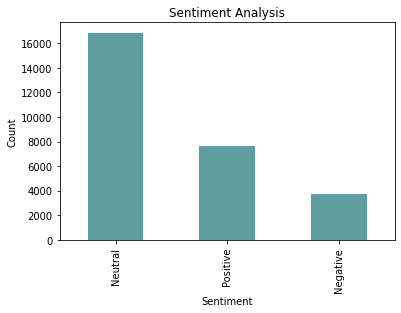

In [31]:
tweets['Sentiment'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
tweets['Sentiment'].value_counts().plot(kind='bar', color='cadetblue')
plt.show()